In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# $$Health-Insurance-Cross-Sell-Prediction$$


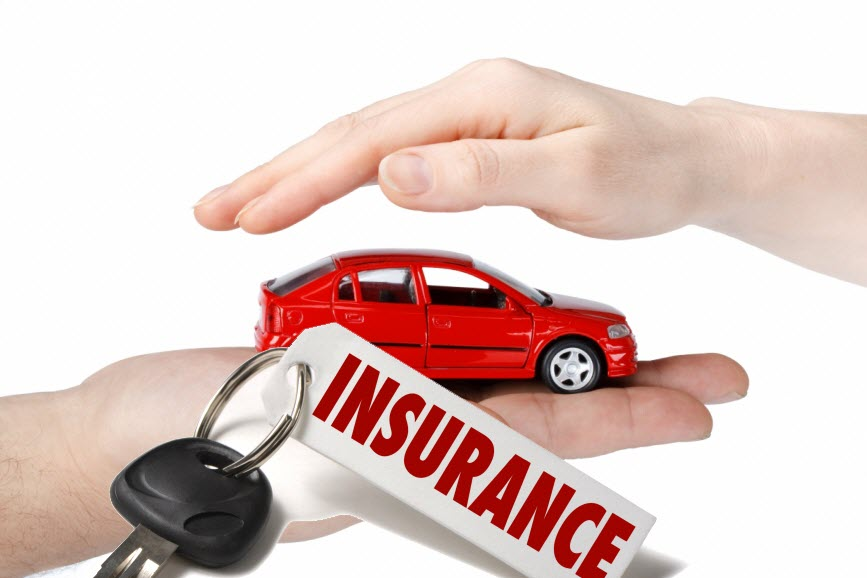

# Prelude

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

# Objective

Build a model to predict whether a policyholder would be interested in Vehicle Insurance. 

# Notebook 
   - Step-1: **Libraries and dataset**
   - Step-2: **Exploratory Data Analysis**
   - Step-3: **Data Cleaning and Preprocessing**
   - Step-4: **Data-Modelling-and-Evaluation**
   - Step-5: **Concluding Remarks**

# **Step-1: $$Importing-Libraries-and-Dataset$$**

## Libraries

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import shap

## Dataset
   - 1.a. Training Dataset

In [ ]:
dataset= pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
dataset.head()

In [ ]:
# Checking Missing values
dataset.isna().sum()

In [ ]:
# Identifying datatypes and shape of training dataset
print(dataset.shape)
dataset.dtypes

In [ ]:
# Drop ID
dataset.drop(labels='id',axis=1,inplace=True)
dataset.head()

In [ ]:
# numeric features in dataset
dataset_num_features = ['Age', 'Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

#Catagorical features dataset
dataset_cat_features = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']

# Step-2 $$Exploratory-Data-Analysis$$

### 2.a - Numeric features

In [ ]:
print(dataset_num_features)

In [ ]:
dataset[dataset_num_features].describe()

### Data Distribution
   - **numeric features**

In [ ]:
for i in dataset_num_features:   
    plt.figure(figsize=(10,8),dpi=100)
    sns.violinplot(x="Response",y=i, data=dataset)
    plt.title(f"Response by {i}")
    plt.show()

**Inference** :
   - Age: 
       - Between 20 to 85 years old.
       - 3/4 of the customer are below 50 years of age

   - Annual_premium:
       - Average annual premium ~ 30.5k. 
       
   - Vintage: 
       - Average customer association rate with company is approx 5 months.
       - Half of the customers are associated with the company between ~3 to ~7 months.


### Converting num_features to Cat_features

In [ ]:
 

# Age
Age_range = pd.Series(pd.cut(dataset.Age, bins = 6, precision = 0),name='Age_range')

# Region_Code
Region_Code_range = pd.Series(pd.cut(dataset.Region_Code, bins = 10, precision = 0),name='Region_Code_range')

#Annual_Primium
Annual_Primium_range = pd.Series(pd.cut(dataset.Annual_Premium, bins = 5, precision = 0),name='Annual_Primium_range')

#Policy_Sales_Channel
Policy_Sales_Channel_range = pd.Series(pd.cut(dataset.Policy_Sales_Channel,bins = 10, precision = 0),name='Policy_Sales_Channel_range')

#Vintage
Vintage_range =pd.Series(pd.cut(dataset.Vintage,bins = 5, precision = 0),name='Vintage_range')

In [ ]:
# Modified Categorical Dataset:

mod_dataset = pd.concat([Age_range,
                Region_Code_range,
                Annual_Primium_range,
                Policy_Sales_Channel_range,
                Vintage_range], 
               axis=1)

print('Modified Dataset Shape :', mod_dataset.shape,'\n______________________________________\n')
print('New Columns:',mod_dataset.columns,'\n______________________________________\n' )
print(mod_dataset.dtypes,'\n______________________________________\n')

mod_dataset.head()

In [ ]:
#Age_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Age_range, hue=dataset.Response)
plt.xticks()
plt.xlabel('Age_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Region_Code_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Region_Code_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Region_Code_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Annual_Primium_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Annual_Primium_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Annual_Primium_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Policy_Sales_Channel_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Policy_Sales_Channel_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Policy_Sales_Channel_range',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#Vintage_range
plt.figure(figsize=(10,7),dpi=300)
sns.countplot(x=Vintage_range, hue=dataset.Response)
plt.xticks(fontsize=8)
plt.xlabel('Vintage_range',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.show()

# plt.subplot(2,3,6)
# sns.countplot(x=Age_range)
# plt.xticks(fontsize=8)
# plt.xlabel('Age_range',fontsize=14)
# plt.ylabel('Count',fontsize=14)


**Inference:**

**Age**
   - Majority of the customers are between the age group of 20-30 years.
   - Most of the negative response came from these age group. 
   - In contrast, age groups between 30 - 60 years were more positive towards buying Car Insurance.
   
**Region Code**
  - The region code doesn't seems to influence the response. Larger customer base is observed in the region code between 26 to 31, the majority of the customers are from these regions in both positive and negative response groups.
   
**Annual Premium**
   - The Annual Premium also doesn't seems to influence the response.
   
**Policy Sales Channel**
   - The Policy Sales Channel between 147-163 showed a significant spike in negative response, but overal Policy Sales Channe doesn't influence the response.

**Response by Vintage**
   - The data distribution appeared to be simmilar in both positive and negative response group.

### 2.b - Categorical features

In [ ]:
dataset_cat_features

In [ ]:
# getting Dummies for Binary Catagorical features in dataset_mod1:
dataset_mod1=pd.get_dummies(dataset, columns=['Gender','Driving_License','Previously_Insured','Vehicle_Damage'],
                            drop_first=True)

In [ ]:
# getting Dummies for non-binary Catagorical features ataset_mod1:
dataset_mod1=pd.get_dummies(dataset_mod1, columns=['Vehicle_Age'])

In [ ]:
print('\n columns :',dataset_mod1.columns)

print('\n________________________\n Shape:',dataset_mod1.shape)

dataset_mod1.head()

In [ ]:
dataset_mod1_cat_features = ['Gender_Male',
                             'Driving_License_1',
                             'Previously_Insured_1',
                             'Vehicle_Age_1-2 Year',
                             'Vehicle_Age_< 1 Year',
                             'Vehicle_Age_> 2 Years',
                             'Vehicle_Damage_Yes']

#### Data Counts in Categorical features:

In [ ]:
# Data Counts and basic information in Catagorical features
for category in dataset_mod1_cat_features:
    print(dataset_mod1[category].value_counts(), '\n____________________________________\n')


In [ ]:
# ploting counts 

plt.figure(figsize=(30,20),dpi=300)
#Gender
plt.subplot(2,3,1)
sns.countplot(x=dataset_mod1.Gender_Male)
plt.xlabel('Gender_Male',fontsize=14)
plt.ylabel('Count',fontsize=14)


# Driving_License
plt.subplot(2,3,2)
sns.countplot(x=dataset_mod1.Driving_License_1)
plt.xlabel('Driving_License_1',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Previously_Insured
plt.subplot(2,3,3)
sns.countplot(x=dataset_mod1.Previously_Insured_1)
plt.xlabel('Previously_Insured_1',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Vehicle_Age
plt.subplot(2,3,4)
sns.countplot(x=dataset_mod1['Vehicle_Age_> 2 Years'])
plt.xlabel('Vehicle_Age_> 2 Years',fontsize=14)
plt.ylabel('Count',fontsize=14)

# Vehicle_Damage
plt.subplot(2,3,5)
sns.countplot(x=dataset_mod1.Vehicle_Damage_Yes)
plt.xlabel('Vehicle_Damage_Yes',fontsize=14)
plt.ylabel('Count',fontsize=14)

#Response
plt.subplot(2,3,6)
sns.countplot(x=dataset.Response)
plt.xlabel('Response',fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.show()

print(f"""Positive Response - {dataset.Response.value_counts()[1]/
(dataset.Response.value_counts()[1] + dataset.Response.value_counts()[0])*100}%""")



**Inference** :
   - The Number of male is slightly higher than the female customer.
   - Majority of them have driving license
   - The Number of previously insured is slightly less compared to number of previously uninsured customers.
   - Majority of the customers have vehicle age less than 2 years.
   - the dataset has slightly more customers with previous vehicle damage experience compared to the customers with no previous experince with vehicle damage.
   - Only 12% out of 381109 customers responded positive to the purchase the additional vehicle insurance offer. this results in a sample size of 46710 positive responses. 

#### Data Distribution in Categirical features 

In [ ]:
#data distribution of categorical features in both response group
for i in dataset_mod1_cat_features:   
    plt.figure(figsize=(10,8),dpi=100)
    sns.violinplot(x="Response",y=i, data=dataset_mod1)
    plt.title(f"Response by {i}")
    plt.show()


**Inference**:
- Based on the dataset $Gender$, $DrivingLicense$, $RegionCode$ doesn't influence the Response to the vehicle insurence purchasing option.

- A majority of the customer who gave positive response are not $PreviouslyInsured$.

- Customers with newer cars are less willing to buy vehicle insurance

- Customers with no previous experience in Vehicle damage is more reluctent for vehicle insurance.

- Customers from Policy_Sales_Channel arround 25 and 125 showed more positive response. 


#### Correlation between feature

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
plt.title("Correlation plot")
sns.heatmap(dataset_mod1.corr(),linewidths=5, annot=True,annot_kws={'size': 8},cmap='coolwarm')

#### - Premium Vs Age :

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x=dataset_mod1.Annual_Premium,y=dataset.Age, hue=dataset.Response)
plt.show()

- Most of the customers who responded yes are paying less than 10K as Annual Primium.

#### - Premium vs Vintage 

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x=dataset_mod1.Annual_Premium,y=dataset.Vintage, hue=dataset.Response)
plt.show()

- Majority of the customers who responded yes are with company for more than 3 months.

#### - Age Vs Vintage 

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
sns.scatterplot(x=dataset_mod1.Age,y=dataset.Annual_Premium, hue=dataset.Response)
plt.show()

- Most of the customers who responded yes are between 30 to 60 years of age and paying less than 10K as Annual Primium

# Step-3 $$Data-Cleaning-and-Preprocessing$$

In [ ]:
# Colums in dataset_mod1
print(dataset_mod1.columns)

In [ ]:
# Arranging columns in dataset_mod1:
dataset_mod1= dataset_mod1[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Damage_Yes', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Response']]

In [ ]:
# Renaming columns in dataset_mod1 to prevent future problems with XGBClassifier
dataset_mod1=dataset_mod1.rename(columns={'Vehicle_Age_1-2 Year':'Vehicle_Age_1_to_2 Year','Vehicle_Age_< 1 Year':'Vehicle_Age_lessthan_1_Year',
                             'Vehicle_Age_> 2 Years':'Vehicle_Age_morethan_2 Years'})
dataset_mod1

In [ ]:
print('\n Shape:', dataset_mod1.shape,'\n__________________________\n')
print('Column:',dataset_mod1.columns)

In [ ]:
# Previous Colum names:
print(dataset_mod1_cat_features)

In [ ]:
# modified column names: 
dataset_mod1_cat_features = ['Gender_Male', 'Driving_License_1', 'Previously_Insured_1',
'Vehicle_Damage_Yes', 'Vehicle_Age_1_to_2 Year',
       'Vehicle_Age_lessthan_1_Year', 'Vehicle_Age_morethan_2 Years']
print(dataset_mod1_cat_features)

In [ ]:
# Assigned independent and the target features.

X = dataset_mod1.iloc[:, 0:-1]
Y = dataset_mod1.iloc[:, -1]

print(X.shape)
print(Y.shape)

In [ ]:
print(X)

In [ ]:
print(Y)

### Encoding the dependent/target/response Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y= le.fit_transform(Y)
print(Y)

## Splitting the dataset into the Training set and Test/validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.01, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_train)

In [ ]:
print(X_test.shape)
print(X_test)

In [ ]:
print(Y_train.shape)
print(Y_train)

In [ ]:
print(Y_test.shape)
print(Y_test)

## Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
# print(X_train.shape)
# print(X_train)

In [ ]:
# print(X_test.shape)
# print(X_test)

# Step-4 $$Data-Modelling-and-Evaluation$$

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

## 4.1 - Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## 4.1.a - RF (Default)

In [ ]:
RF_classifier = RandomForestClassifier()

In [ ]:
RF_classifier.fit(X_train, Y_train)

### Predicting the Test/Validation set response

In [ ]:
Y_pred = RF_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

### Classification Report


In [ ]:
print (classification_report(Y_test, Y_pred))

### Confusion Matrix

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

print(cm)
print(f"Accuracy Score :{accuracy_score(Y_test, Y_pred)}")

plt.figure(figsize=(10,5),dpi=80)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2', cmap='Blues')
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

CV_accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(CV_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(CV_accuracies.std()*100))

### Feature Importances

In [ ]:
feat_importances = pd.Series(RF_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Ploting AUC/ROC  

In [ ]:
Y_pred_proba = RF_classifier.predict_proba(X_test)
(fpr, tpr,_) = roc_curve(Y_test, Y_pred_proba[:,1])

plt.figure(figsize=(10,7),dpi=100)
plt.plot(fpr,tpr)
plt.title('Receiver operating characteristic Curve: HICSP')
plt.xlabel('False Positive Rate(FPR):Precision')
plt.ylabel('True Positive Rate (TPR): Recall')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## 4.1.b - RF (Random Search)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# RF Params:
RF_parameters = {'n_estimators': [100],
                 'criterion': ['entropy', 'gini'],
                 'min_samples_split': [5, 7,10],
                 'min_samples_leaf': [4, 6, 8],
                 'max_depth': [2,3,4,5,6,7,10]
                }

In [ ]:
RF_classifier_random = RandomizedSearchCV(estimator = RF_classifier, param_distributions = RF_parameters, n_iter = 10, 
                               cv = 10, verbose= 1, random_state= 404, n_jobs = -1)

In [ ]:
RF_classifier_random.fit(X_train, Y_train)

### Predicting the Test/Validation set results

In [ ]:
Y_pred = RF_classifier_random.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

### Classification Report¶


In [ ]:
print (classification_report(Y_test, Y_pred))

### Confusion Matrix

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

print(cm)
print(f"Accuracy Score :{accuracy_score(Y_test, Y_pred)}")

plt.figure(figsize=(10,5),dpi=80)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2', cmap='Blues')
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

### Ploting AUC/ROC  

In [ ]:
Y_pred_proba = RF_classifier_random.predict_proba(X_test)
(fpr, tpr,_) = roc_curve(Y_test, Y_pred_proba[:,1])

plt.figure(figsize=(10,7),dpi=100)
plt.plot(fpr,tpr)
plt.title('Receiver operating characteristic Curve: HICSP')
plt.xlabel('False Positive Rate(FPR):Precision')
plt.ylabel('True Positive Rate (TPR): Recall')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## 4.2.a - XGBClassifier (Default)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB_classifier = XGBClassifier()

In [ ]:
XGB_classifier.fit(X_train, Y_train)

### Predicting the Test/Validation set results¶¶

In [ ]:
Y_pred = XGB_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

### Classification Report

In [ ]:
print (classification_report(Y_test, Y_pred))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print(cm)
print(f"Accuracy Score :{accuracy_score(Y_test, Y_pred)}")

plt.figure(figsize=(10,5),dpi=80)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2', cmap='Blues')
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

CVS_accuracies = cross_val_score(estimator = XGB_classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(CVS_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(CVS_accuracies.std()*100))

### Ploting AUC/ROC  

In [ ]:
Y_pred_proba = XGB_classifier.predict_proba(X_test)
#Classifier_scores = classifier.predict_proba(X_test)[:,1]
(fpr, tpr,_) = roc_curve(Y_test, Y_pred_proba[:,1])

plt.figure(figsize=(10,7),dpi=100)
plt.plot(fpr,tpr)
plt.title('Receiver operating characteristic Curve: HICSP')
plt.xlabel('False Positive Rate(FPR):Precision')
plt.ylabel('True Positive Rate (TPR): Recall')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### Feature Importances

In [ ]:
# explainer = shap.TreeExplainer(XGB_classifier)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, plot_type="bar")
# shap.summary_plot(shap_values, X_test, plot_size=(10,8))

In [ ]:
feature_importance = XGB_classifier.get_booster().get_score(importance_type='total_gain')
keys = list(feature_importance.keys())
values = list(feature_importance.values())

feature_importance_data = pd.DataFrame(data=values, index=keys, 
                                       columns=["score"]).sort_values(by = "score", ascending=True)

feature_importance_data.plot(kind='barh',figsize=(10,7))

## 4.2.b - XGBClassifier (RandomizedSearch)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# A parameter grid for XGBClassifier
XGB_parameters = {'eta':[0.01,0.02,0.03,0.04,0.05],
          'gamma': [0.5, 1, 1.5, 2, 5],
          'max_depth': [3, 5, 7, 9],
          'min_child_weight': [1, 5, 10],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0]
         }

In [ ]:
XGB_classifier_random = RandomizedSearchCV(estimator = XGB_classifier, param_distributions = XGB_parameters, n_iter = 10, 
                               cv = 10, verbose= 1, random_state= 42, n_jobs = -1)

In [ ]:
XGB_classifier_random.fit(X_train, Y_train)

### Predicting the Test/Validation set results¶¶

In [ ]:
Y_pred = XGB_classifier_random.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

### Classification Report

In [ ]:
print (classification_report(Y_test, Y_pred))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print(cm)
print(f"Accuracy Score :{accuracy_score(Y_test, Y_pred)}")

plt.figure(figsize=(10,5),dpi=80)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2', cmap='Blues')
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

### Ploting AUC/ROC  

In [ ]:
Y_pred_proba = XGB_classifier_random.predict_proba(X_test)
(fpr, tpr,_) = roc_curve(Y_test, Y_pred_proba[:,1])

plt.figure(figsize=(10,7),dpi=100)
plt.plot(fpr,tpr)
plt.title('Receiver operating characteristic Curve: HICSP')
plt.xlabel('False Positive Rate(FPR):Precision')
plt.ylabel('True Positive Rate (TPR): Recall')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

# 4.3 - CatBoost

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
Cat_classifier = CatBoostClassifier()

In [ ]:
Cat_classifier = Cat_classifier.fit(X_train,Y_train,
                                    eval_set = (X_test, Y_test), 
                                    cat_features = dataset_mod1_cat_features,
                                    use_best_model = True,
                                    plot = True,
                                    early_stopping_rounds = 10,
                                    )

### Predicting the Test/Validation set results

In [ ]:
Y_pred = Cat_classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

### Classification Report

In [ ]:
print (classification_report(Y_test, Y_pred))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print(cm)
print(f"Accuracy Score :{accuracy_score(Y_test, Y_pred)}")

plt.figure(figsize=(10,5),dpi=80)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2', cmap='Blues')
plt.xlabel('Predicted label',fontsize=14)
plt.ylabel('True label',fontsize=14)
plt.show()

### Ploting AUC/ROC  

In [ ]:
Y_pred_proba = Cat_classifier.predict_proba(X_test)
(fpr, tpr,_) = roc_curve(Y_test, Y_pred_proba[:,1])

plt.figure(figsize=(10,7),dpi=100)
plt.plot(fpr,tpr)
plt.title('Receiver operating characteristic Curve: HICSP')
plt.xlabel('False Positive Rate(FPR):Precision')
plt.ylabel('True Positive Rate (TPR): Recall')
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### Feature Importances

#### Shap based importance:

In [ ]:
explainer = shap.TreeExplainer(Cat_classifier)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_test, plot_size=(10,8))

# Conclusion and Results:

**Out of all the tested models here i.e. RF(default), RF_random(RandomizedSearch), XGB(Default), XGB_random(RandomisedSearch) and CatBoost, we were able to get an accuracy score of 87.93% with XGB_random. The score was closely followed by XGB(Default)and CatBoost, both yielding the accuracy score of 87.9%.** 

**As we found the highest AUC score of 84.93% with XGB(Default), Compared to 84.7% with XGB_random and 84.58% with CatBoost, We will proceed to apply XGB(Default) model on provided test dataset**

## $$Work in Progress:$$

###   1. Tuning XGB and CatBoost for better performance
